In [3]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 20.6 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [5]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 KB 26.3 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
import math
import numpy as np
np.random.seed(24)
import pandas as pd
from tqdm import tqdm

from sympy import *
import operator
from IPython.core.display import display

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler

import torch
torch.manual_seed(24)
from torch.autograd import Variable
import torch.utils.data as data_utils
import torch.nn.init as init
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
import torch
from torch.autograd import Variable

In [8]:
data = load_breast_cancer()

X = data['data']
y = data['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=24)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=24)
X_train = Variable(torch.from_numpy(X_train))
X_val = Variable(torch.from_numpy(X_val))
y_train = Variable(torch.from_numpy(y_train))
y_val = Variable(torch.from_numpy(y_val))
X_test = Variable(torch.from_numpy(X_test))
y_test = Variable(torch.from_numpy(y_test))

In [9]:
y_train

tensor([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

In [10]:
df_data = pd.DataFrame(X, columns=data['feature_names'])
df_data['target'] = y
df_benign = df_data[df_data['target'] == 1].reset_index(drop=True)
df_malignant = df_data[df_data['target'] == 0].reset_index(drop=True)

In [11]:
df_benign

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
353,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
354,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
355,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [12]:
df_malignant

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
208,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
209,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
210,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [13]:
df_train = pd.DataFrame(X_train, columns=data['feature_names'])
df_train['target'] = y_train
df_val = pd.DataFrame(X_val, columns=data['feature_names'])
df_val['target'] = y_val
df_test = pd.DataFrame(X_test, columns=data['feature_names'])
df_test['target'] = y_test

In [14]:
df_data['target'].value_counts() / len(df_data) * 100

1    62.741652
0    37.258348
Name: target, dtype: float64

Text(0, 0.5, '% of Cases')

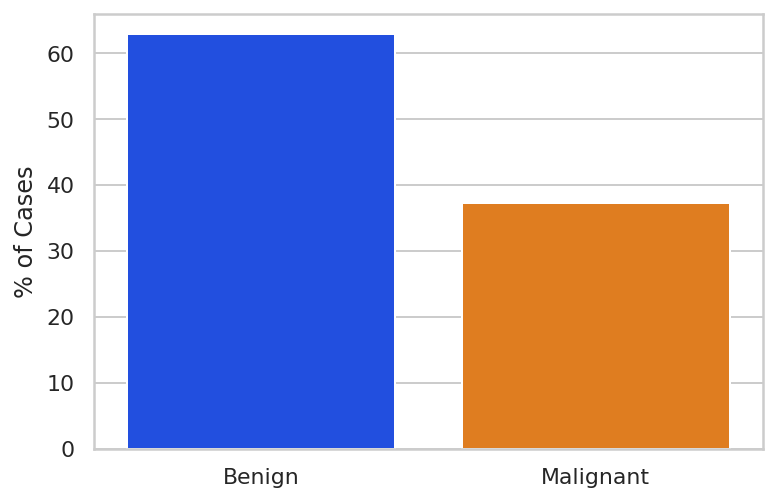

In [15]:
class_names = ['Benign', 'Malignant']
class_pc = [62.8, 37.3]
f, ax = plt.subplots()
sns.barplot(x=class_names, y=class_pc, ax=ax)
ax.set_ylabel('% of Cases')
# f.savefig('images/chapter_04_class_pc.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_class_pc.pdf', format='pdf', dpi=300, bbox_inches='tight');

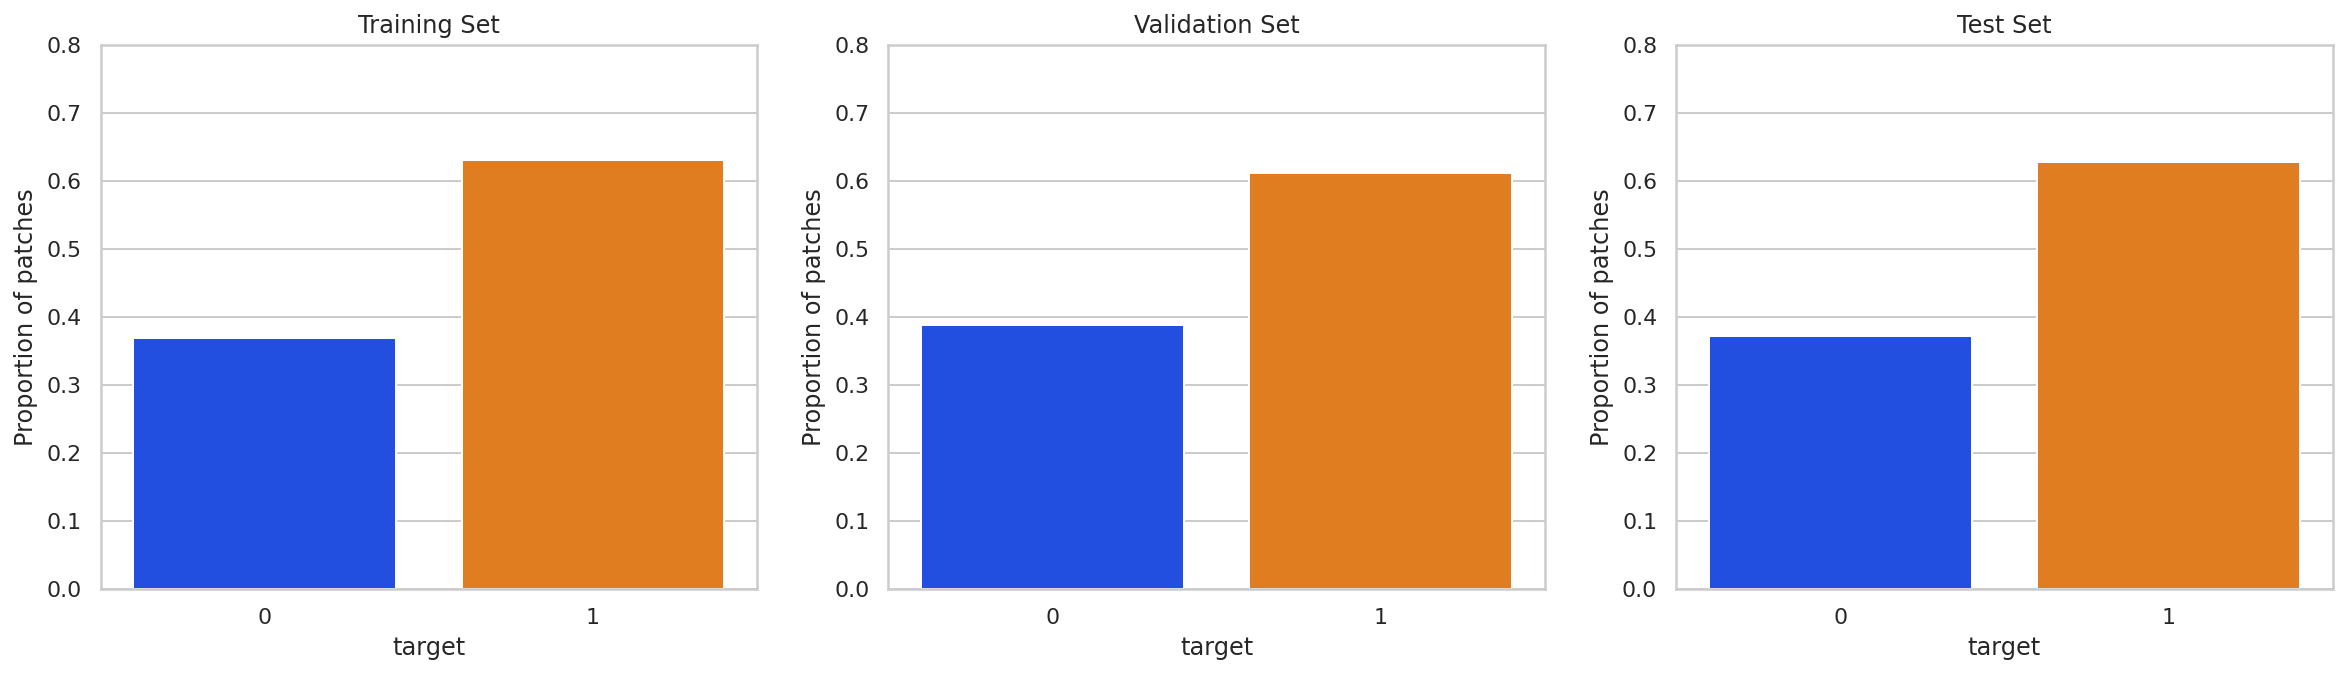

In [16]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))
df_train['target'].\
    value_counts(normalize=True).\
    rename('pc').reset_index().\
    rename(columns={'index': 'target'}).\
    pipe((sns.barplot, "data"), x='target', y='pc', ax=ax[0])
df_val['target'].\
    value_counts(normalize=True).\
    rename('pc').reset_index().\
    rename(columns={'index': 'target'}).\
    pipe((sns.barplot, "data"), x='target', y='pc', ax=ax[1])
df_test['target'].\
    value_counts(normalize=True).\
    rename('pc').reset_index().\
    rename(columns={'index': 'target'}).\
    pipe((sns.barplot, "data"), x='target', y='pc', ax=ax[2])
ax[0].set_ylabel('Proportion of patches')
ax[1].set_ylabel('Proportion of patches')
ax[2].set_ylabel('Proportion of patches')
ax[0].set_ylim([0, 0.8])
ax[1].set_ylim([0, 0.8])
ax[2].set_ylim([0, 0.8])
ax[0].set_title('Training Set')
ax[1].set_title('Validation Set')
ax[2].set_title('Test Set');
# f.savefig('images/chapter_04_train_val_test_splits.png', dpi=300, bbox_inches='tight')
# f.savefig('images/chapter_04_train_val_test_splits.pdf', format='pdf', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Worst Cell Area Distribution')

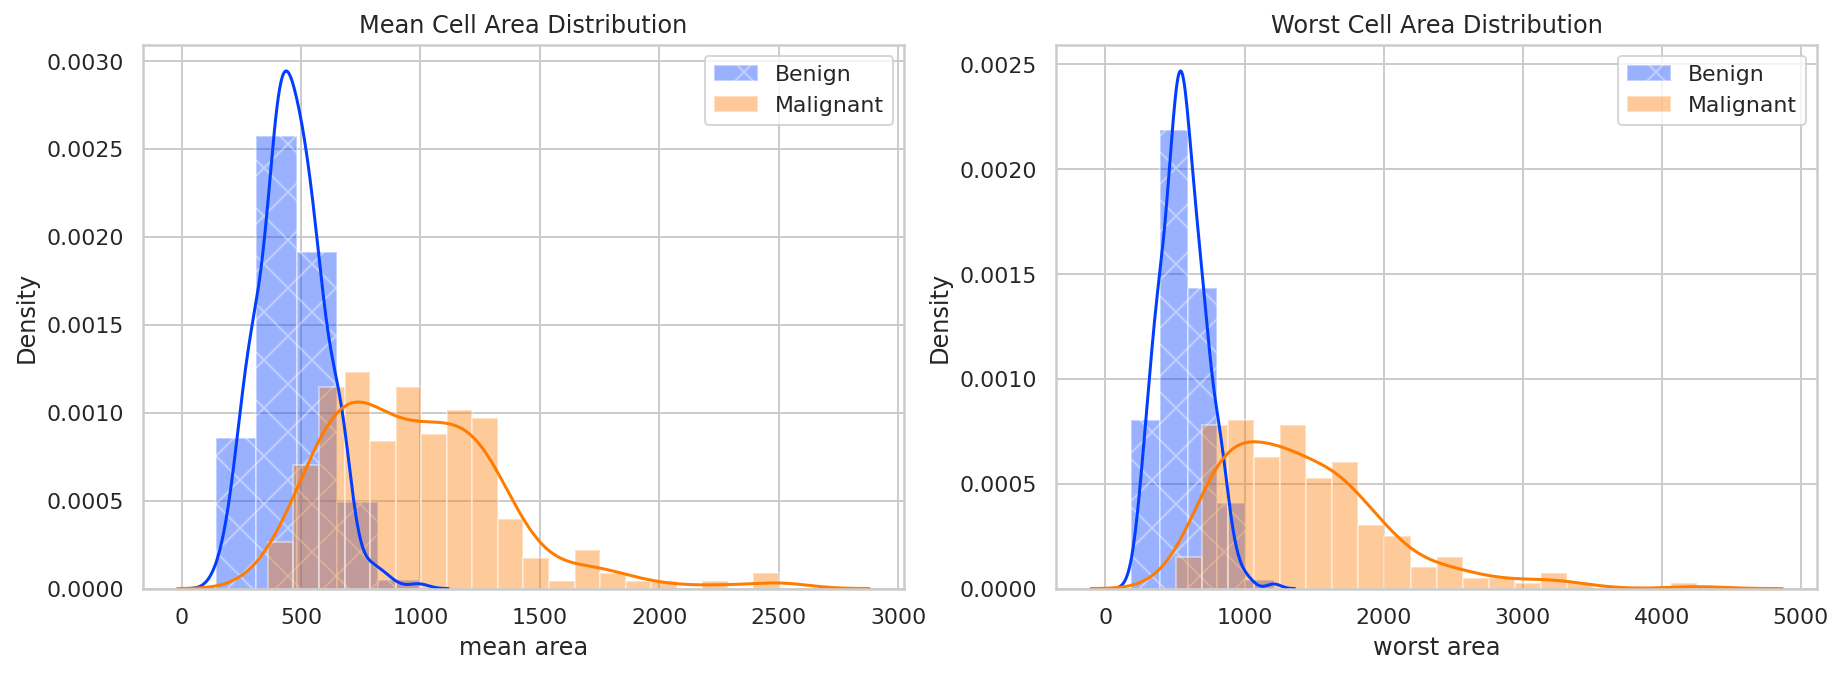

In [17]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_benign['mean area'], 
             bins=5, 
             ax=ax[0], 
             label='Benign',
             hist_kws={"hatch": "x"})
sns.distplot(df_malignant['mean area'], bins=20, ax=ax[0], label='Malignant')
ax[0].legend()
sns.distplot(df_benign['worst area'], bins=5, ax=ax[1], label='Benign',
             hist_kws={"hatch": "x"})
sns.distplot(df_malignant['worst area'], bins=20, ax=ax[1], label='Malignant')
ax[1].legend()
ax[0].set_title('Mean Cell Area Distribution')
ax[1].set_title('Worst Cell Area Distribution')
# f.savefig('images/chapter_04_cell_area_dist.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_cell_area_dist.pdf', format='pdf', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Worst Cell Radius Distribution')

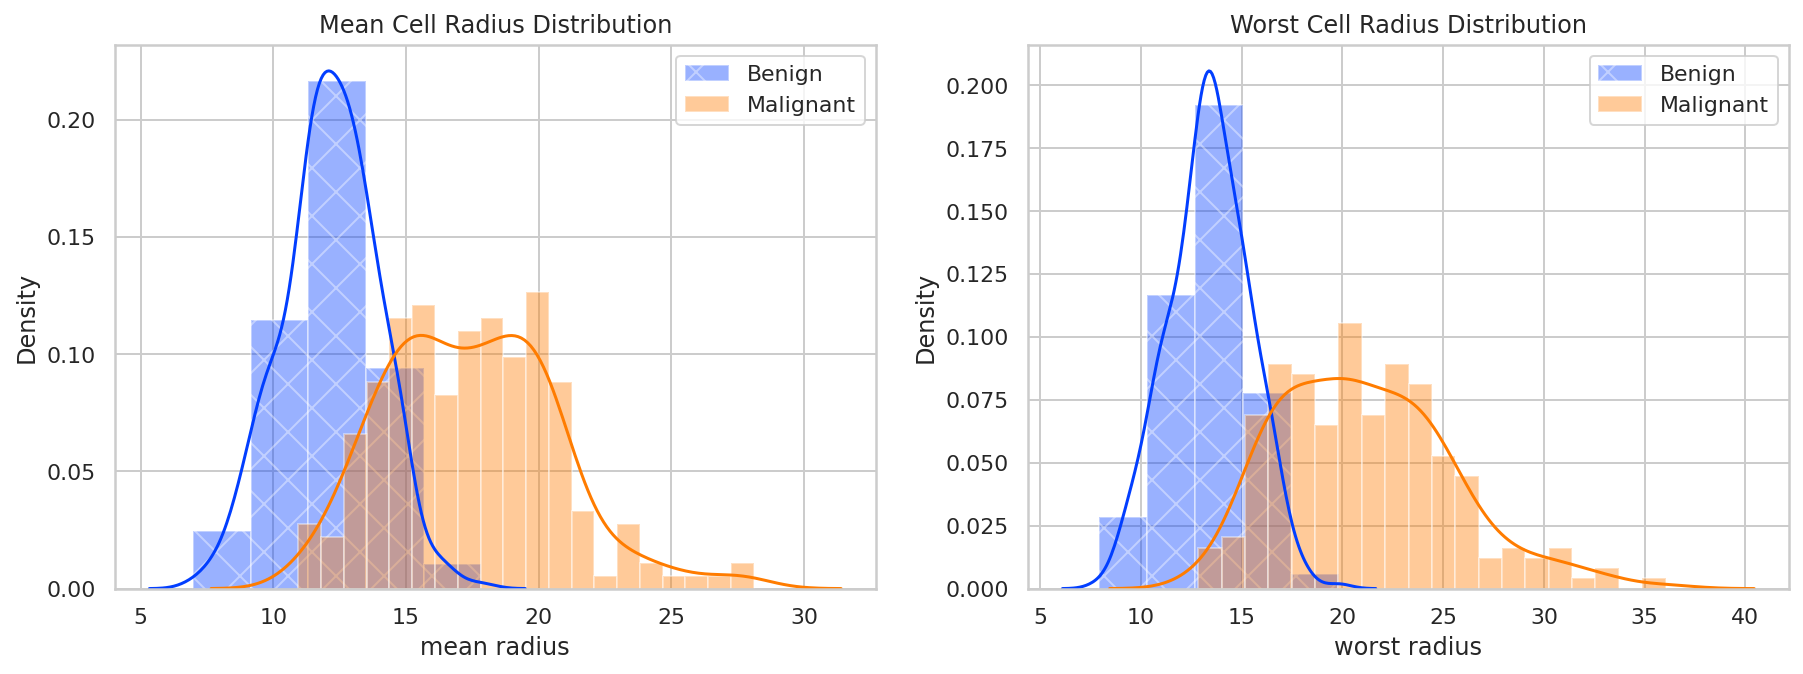

In [18]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_benign['mean radius'], bins=5, ax=ax[0], label='Benign',
             hist_kws={"hatch": "x"})
sns.distplot(df_malignant['mean radius'], bins=20, ax=ax[0], label='Malignant')
sns.distplot(df_benign['worst radius'], bins=5, ax=ax[1], label='Benign',
             hist_kws={"hatch": "x"})
sns.distplot(df_malignant['worst radius'], bins=20, ax=ax[1], label='Malignant')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Mean Cell Radius Distribution')
ax[1].set_title('Worst Cell Radius Distribution')
# f.savefig('images/chapter_04_cell_radius_dist.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_cell_radius_dist.pdf', format='pdf', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Worst Cell Perimeter Distribution')

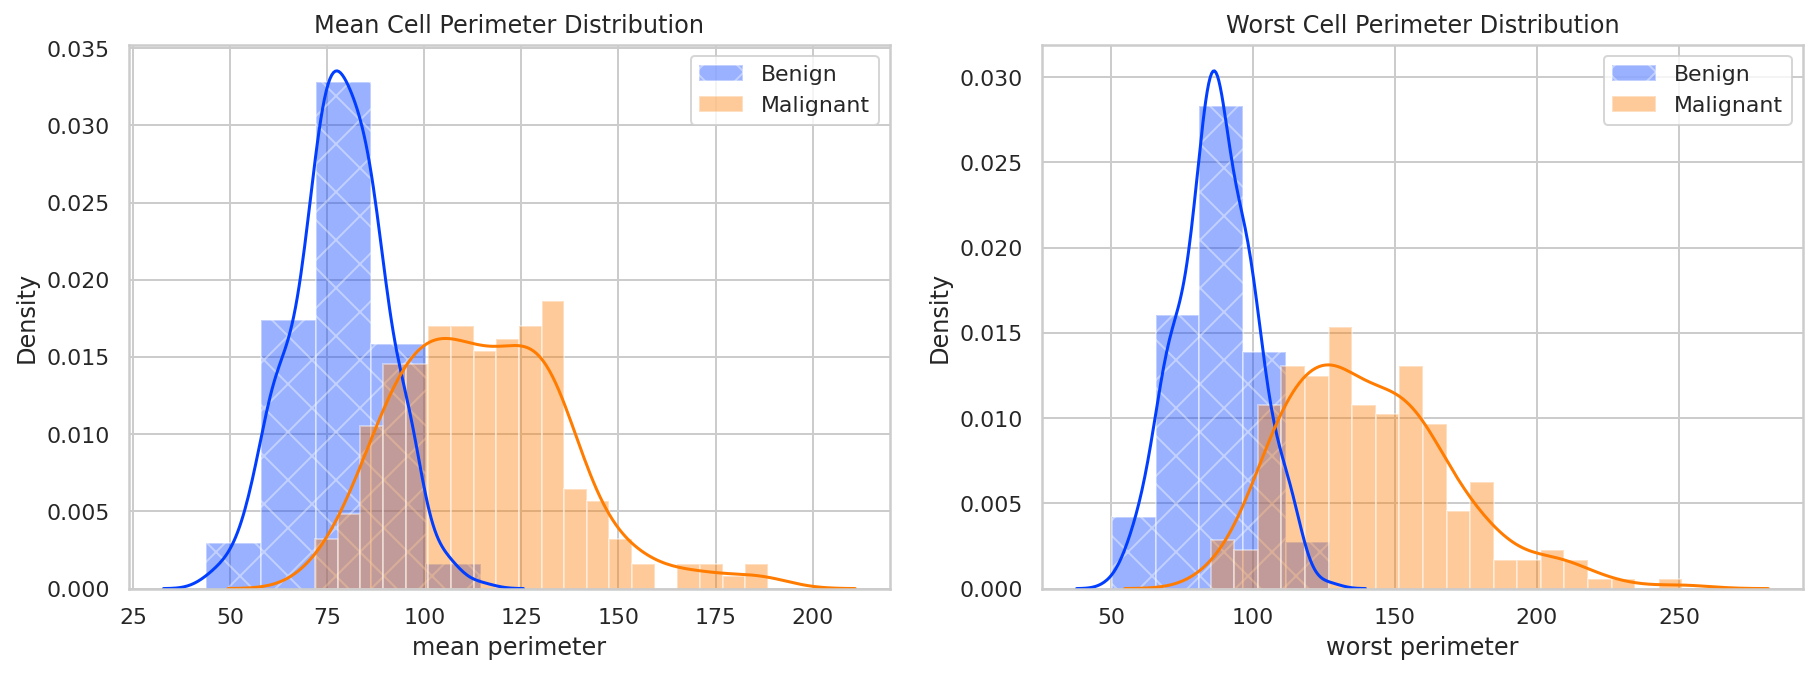

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_benign['mean perimeter'], bins=5, ax=ax[0], label='Benign',
             hist_kws={"hatch": "x"})
sns.distplot(df_malignant['mean perimeter'], bins=20, ax=ax[0], label='Malignant')
sns.distplot(df_benign['worst perimeter'], bins=5, ax=ax[1], label='Benign',
             hist_kws={"hatch": "x"})
sns.distplot(df_malignant['worst perimeter'], bins=20, ax=ax[1], label='Malignant')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Mean Cell Perimeter Distribution')
ax[1].set_title('Worst Cell Perimeter Distribution')
# f.savefig('images/chapter_04_cell_perimeter_dist.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_cell_perimeter_dist.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [20]:
corr = df_data.corr()

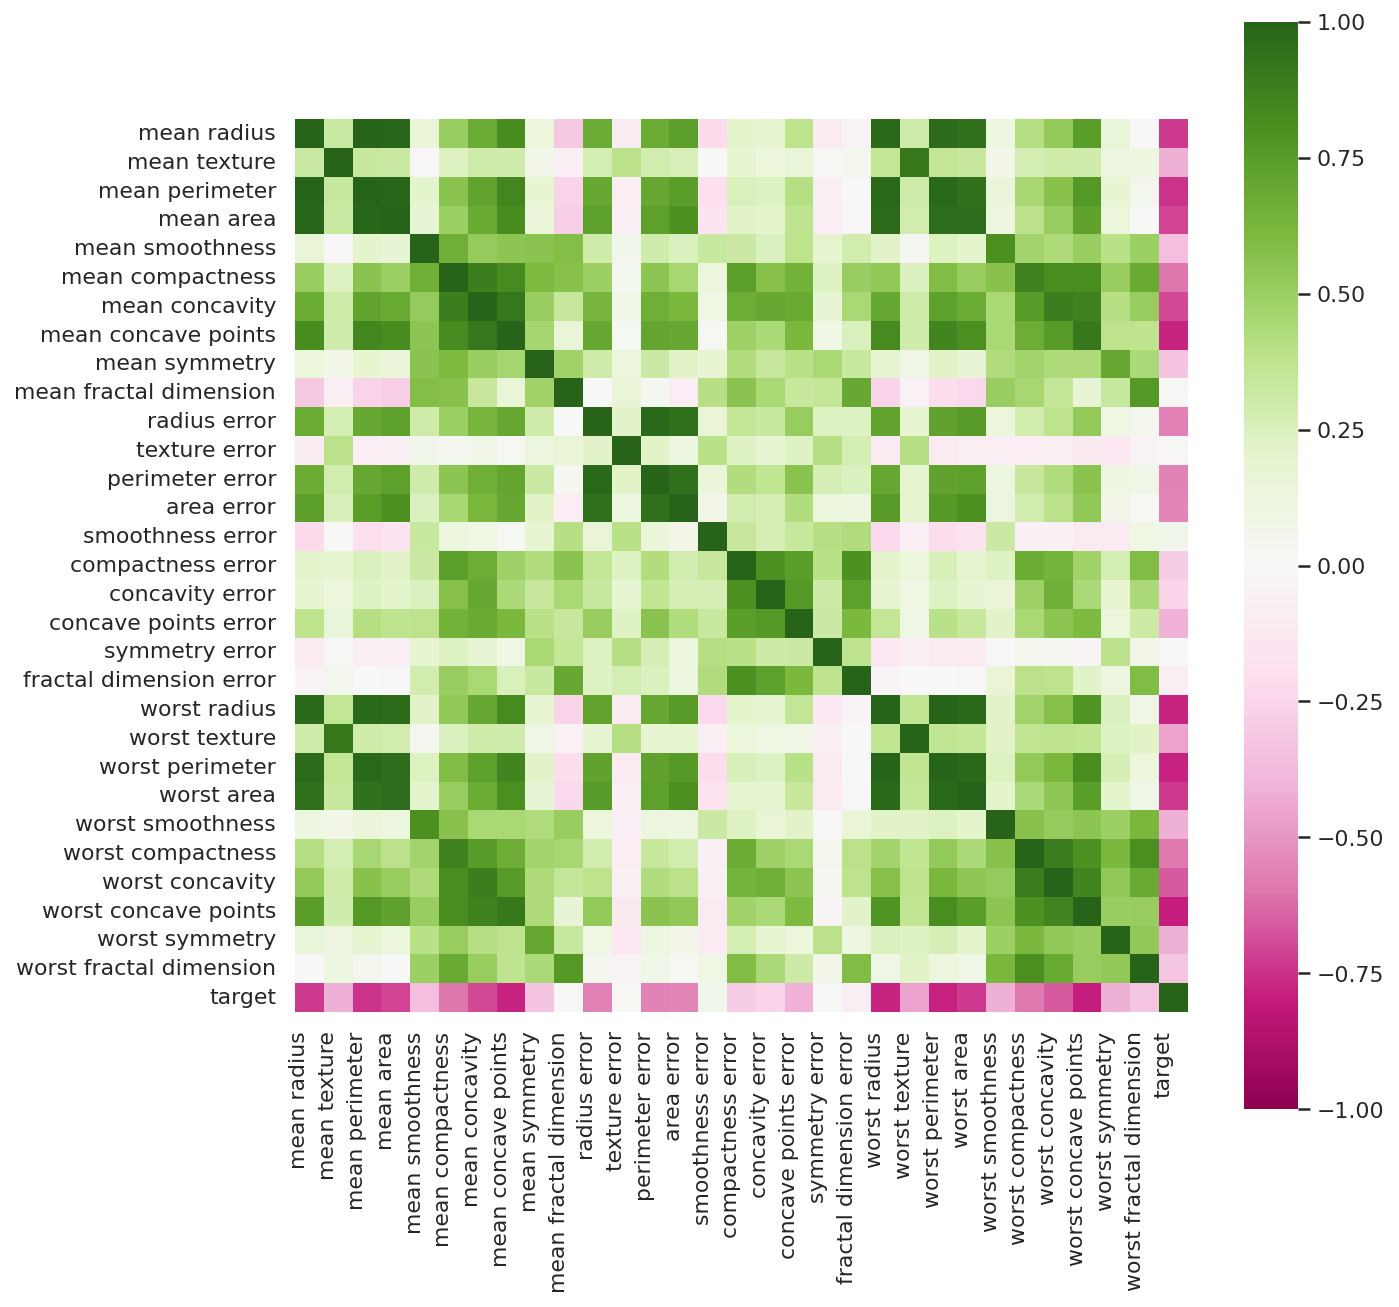

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="PiYG",
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
# f.savefig('images/chapter_04_feature_correlation.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_feature_correlation.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [22]:
class Model(torch.nn.Sequential):
    def __init__(self, layer_dims):
        super(Model, self).__init__()
        for idx, dim in enumerate(layer_dims):
            if (idx < len(layer_dims) - 1):
                module = torch.nn.Linear(dim, layer_dims[idx + 1])
                self.add_module("linear" + str(idx), module)
            else:
                self.add_module("sig" + str(idx), torch.nn.Sigmoid())
            if (idx < len(layer_dims) - 2):
                self.add_module("relu" + str(idx), torch.nn.ReLU())

In [23]:
dim_in = X_train.shape[1]
dim_out = 1
layer_dims = [dim_in, 20, 10, 5, dim_out]
model = Model(layer_dims)
print(model)

Model(
  (linear0): Linear(in_features=30, out_features=20, bias=True)
  (relu0): ReLU()
  (linear1): Linear(in_features=20, out_features=10, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=10, out_features=5, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=5, out_features=1, bias=True)
  (sig4): Sigmoid()
)


In [24]:
criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 300
history = { "loss": [], "accuracy": [], "loss_val": [], "accuracy_val": [] }
for epoch in range(num_epochs):
    y_pred = model(X_train.float())
    loss = criterion(y_pred, y_train.view(-1, 1).float())
    prediction = [1 if p > 0.5 else 0 for p in y_pred.data.numpy()]
    correct = (prediction == y_train.numpy()).mean()
    
    y_pred_val = model(X_val.float())
    loss_val = criterion(y_pred_val, y_val.view(-1,1).float())
    prediction_val = [1 if p > 0.5 else 0 for p in y_pred_val.data.numpy()]
    correct_val = (prediction_val == y_val.numpy()).mean()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print('Epoch', epoch, 'Loss:', loss.item(), '- Pred:', y_pred.data[0])
    history["loss"].append(loss.item())
    history["accuracy"].append(100 * correct)
    history["loss_val"].append(loss_val.data.item())
    history["accuracy_val"].append(100 * correct_val)

Epoch 0 Loss: 793.4531860351562 - Pred: tensor([0.1266])
Epoch 1 Loss: 677.9299926757812 - Pred: tensor([0.1678])
Epoch 2 Loss: 596.9193115234375 - Pred: tensor([0.1825])
Epoch 3 Loss: 564.4810791015625 - Pred: tensor([0.1993])
Epoch 4 Loss: 536.34619140625 - Pred: tensor([0.2175])
Epoch 5 Loss: 509.9817199707031 - Pred: tensor([0.2363])
Epoch 6 Loss: 484.6954040527344 - Pred: tensor([0.2509])
Epoch 7 Loss: 460.2453918457031 - Pred: tensor([0.2658])
Epoch 8 Loss: 436.643798828125 - Pred: tensor([0.2822])
Epoch 9 Loss: 413.97332763671875 - Pred: tensor([0.2990])
Epoch 10 Loss: 392.40411376953125 - Pred: tensor([0.3155])
Epoch 11 Loss: 372.0784912109375 - Pred: tensor([0.3319])
Epoch 12 Loss: 353.13531494140625 - Pred: tensor([0.3485])
Epoch 13 Loss: 335.7137756347656 - Pred: tensor([0.3651])
Epoch 14 Loss: 319.9837341308594 - Pred: tensor([0.3816])
Epoch 15 Loss: 306.02716064453125 - Pred: tensor([0.3980])
Epoch 16 Loss: 293.88873291015625 - Pred: tensor([0.4138])
Epoch 17 Loss: 283.545

In [25]:
torch.save(model, '/bc_dnn.mdl')

In [26]:
model = torch.load('/bc_dnn.mdl')

In [27]:
y_pred_test = model.forward(X_test.float()) > 0.5

In [28]:
y_conf = model.forward(X_test.float()).detach().numpy().reshape(-1)

In [29]:
pred = y_pred_test.numpy().reshape(-1)
actual = y_test.numpy()
baseline = np.array([1 for _ in range(len(actual))])

In [30]:
from sklearn.metrics import recall_score, precision_score, f1_score

precision = precision_score(actual, pred)
p_baseline = precision_score(actual, baseline)
r_baseline = recall_score(actual, baseline)
recall = recall_score(actual, pred)
f1 = f1_score(actual, pred)
f1_baseline = f1_score(actual, baseline)
print('Precision: ', precision, 'Recall: ', recall, 'F1: ', f1)
print('(Baseline) Precision: ', p_baseline, 'Recall: ', r_baseline, 'F1: ', f1_baseline)

Precision:  0.9615384615384616 Recall:  0.9259259259259259 F1:  0.9433962264150944
(Baseline) Precision:  0.627906976744186 Recall:  1.0 F1:  0.7714285714285715


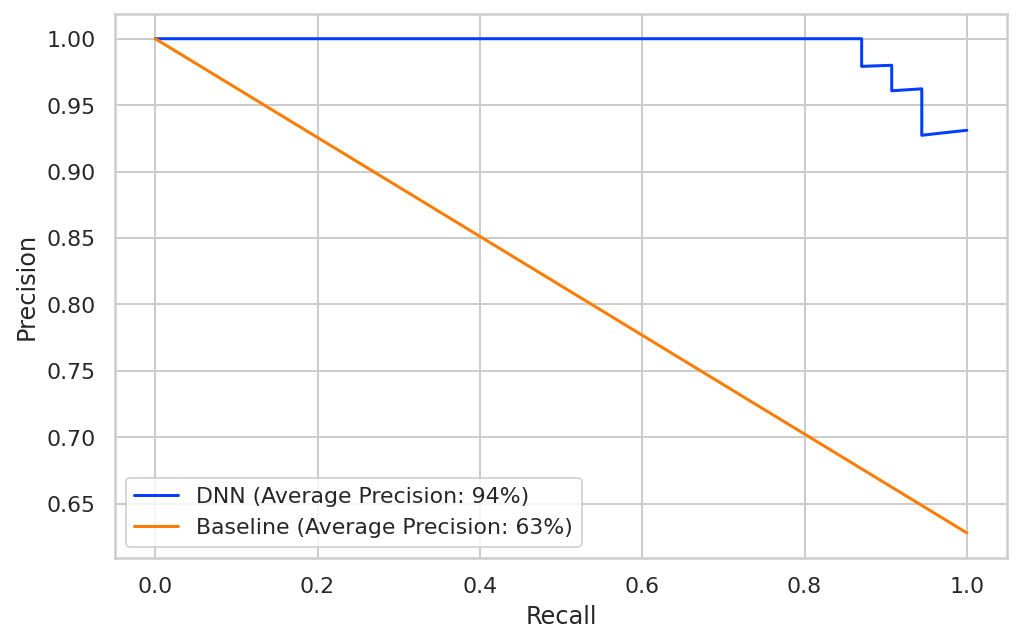

In [31]:
from sklearn.metrics import average_precision_score
pred_p, pred_r, _ = precision_recall_curve(actual, y_conf)
baseline_p, baseline_r, _ = precision_recall_curve(actual, baseline)
pred_ap = average_precision_score(actual, pred)
baseline_ap = average_precision_score(actual, baseline)
f, ax = plt.subplots(figsize=(8, 5))
ax.plot(pred_r, pred_p, label='DNN (Average Precision: %d%%)' % round(pred_ap * 100))
ax.plot(baseline_r, baseline_p, label='Baseline (Average Precision: %d%%)' % round(baseline_ap * 100))
ax.legend()
ax.set_xlabel('Recall')
ax.set_ylabel('Precision');
# f.savefig('images/chapter_04_pr_curve.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_pr_curve.svg', format='svg', dpi=300, bbox_inches='tight');

In [32]:
!pip install prettytable

You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [33]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Parameters: {total_params}")
    return total_params
    
count_parameters(model)

+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear0.weight |    600     |
|  linear0.bias  |     20     |
| linear1.weight |    200     |
|  linear1.bias  |     10     |
| linear2.weight |     50     |
|  linear2.bias  |     5      |
| linear3.weight |     5      |
|  linear3.bias  |     1      |
+----------------+------------+
Total Trainable Parameters: 891


891

#LIME

In [34]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=77f90ebabedc1f6e185aab00aa698d5d96c8046b6ef381176c26460612e805c9
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 12.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 37.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 31.7 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.


In [35]:
import lime
import lime.lime_tabular

In [36]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.numpy(), 
                                                   feature_names=data.feature_names, 
                                                   class_names=data.target_names, 
                                                   discretize_continuous=True)

In [37]:
X_train

tensor([[9.4050e+00, 2.1700e+01, 5.9600e+01,  ..., 3.7700e-02, 2.8720e-01,
         8.3040e-02],
        [1.9550e+01, 2.3210e+01, 1.2890e+02,  ..., 1.8250e-01, 2.5760e-01,
         7.6020e-02],
        [1.3850e+01, 1.9600e+01, 8.8680e+01,  ..., 5.8900e-02, 2.5130e-01,
         6.9110e-02],
        ...,
        [1.9680e+01, 2.1680e+01, 1.2990e+02,  ..., 2.2550e-01, 4.0450e-01,
         7.9180e-02],
        [9.7200e+00, 1.8220e+01, 6.0730e+01,  ..., 0.0000e+00, 1.9090e-01,
         6.5590e-02],
        [1.2700e+01, 1.2170e+01, 8.0880e+01,  ..., 8.2240e-02, 2.7750e-01,
         9.4640e-02]], dtype=torch.float64)

In [38]:
X_test

tensor([[1.2980e+01, 1.9350e+01, 8.4520e+01,  ..., 9.8580e-02, 3.5960e-01,
         9.1660e-02],
        [1.0600e+01, 1.8950e+01, 6.9280e+01,  ..., 7.9260e-02, 2.9400e-01,
         7.5870e-02],
        [1.1060e+01, 1.7120e+01, 7.1250e+01,  ..., 9.5140e-02, 2.7800e-01,
         1.1680e-01],
        ...,
        [1.1670e+01, 2.0020e+01, 7.5210e+01,  ..., 8.1200e-02, 3.2060e-01,
         8.9500e-02],
        [2.0180e+01, 2.3970e+01, 1.4370e+02,  ..., 2.5080e-01, 5.4400e-01,
         9.9640e-02],
        [1.2210e+01, 1.4090e+01, 7.8780e+01,  ..., 9.1400e-02, 2.6770e-01,
         8.8240e-02]], dtype=torch.float64)

In [39]:
benign_idx = np.where(y_test.numpy() == 1)[0][0]
malignant_idx = np.where(y_test.numpy() == 0)[0][0]

In [40]:
y_test

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [41]:
benign_idx

0

In [42]:
malignant_idx

14

In [43]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [44]:
def lime_exp_as_pyplot(exp, label=0, figsize=(8,5)):
    exp_list = exp.as_list(label=label)
    fig, ax = plt.subplots(figsize=figsize)
    vals = [x[1] for x in exp_list]
    names = [x[0] for x in exp_list]
    vals.reverse()
    names.reverse()
    colors = ['green' if x > 0 else 'red' for x in vals]
    pos = np.arange(len(exp_list)) + .5
    ax.barh(pos, vals, align='center', color=colors)
    plt.yticks(pos, names)
    return fig, ax

In [45]:
def prob(data):
    return model.forward(Variable(torch.from_numpy(data)).float()).detach().numpy().reshape(-1, 1)

In [46]:
y_conf

array([5.54280996e-01, 5.54280996e-01, 5.54280996e-01, 5.54280996e-01,
       5.02609432e-01, 4.46965903e-01, 5.54280996e-01, 5.54280996e-01,
       3.42027724e-01, 5.54280996e-01, 5.54280996e-01, 5.54280996e-01,
       4.93022472e-01, 5.54280996e-01, 4.46438305e-02, 4.32505071e-01,
       8.41208845e-02, 5.54280996e-01, 5.15134871e-01, 5.54280996e-01,
       5.54280996e-01, 5.54280996e-01, 9.55968062e-07, 5.27495086e-01,
       5.02688717e-03, 2.89072782e-01, 4.05358151e-03, 5.79614341e-02,
       8.64247777e-05, 5.54280996e-01, 5.54280996e-01, 5.54280996e-01,
       5.87589566e-05, 5.54280996e-01, 5.54280996e-01, 5.54280996e-01,
       3.17797996e-04, 5.54280996e-01, 5.45515597e-01, 5.54280996e-01,
       5.54280996e-01, 5.54280996e-01, 5.54280996e-01, 5.54280996e-01,
       5.54280996e-01, 5.54280996e-01, 1.28673404e-01, 5.54280996e-01,
       5.54280996e-01, 5.54280996e-01, 5.54280996e-01, 5.47943771e-01,
       1.14370078e-01, 5.48508346e-01, 6.82656979e-03, 5.54280996e-01,
      

In [47]:
y_conf[benign_idx]

0.554281

Text(0.5, 1.0, 'Benign Case 1 (DNN Confidence: 55%) | Kernel Width = None (Score: 0.15)')

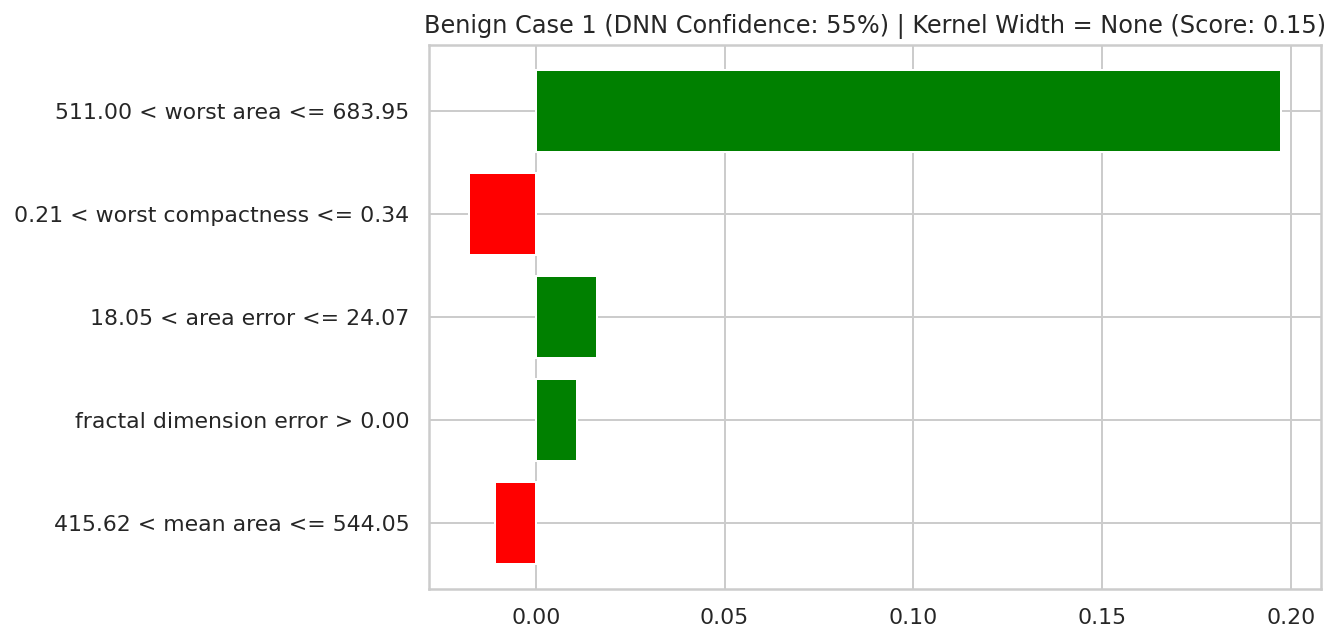

In [48]:
bc1_lime = explainer.explain_instance(X_test.numpy()[benign_idx], 
                                 prob, 
                                 num_features=5, 
                                 top_labels=1)
f, ax = lime_exp_as_pyplot(bc1_lime)
ax.set_title('Benign Case 1 (DNN Confidence: %d%%) | Kernel Width = None (Score: %.2f)' % (round(y_conf[benign_idx] * 100),
                                                                                            bc1_lime.score))
# f.savefig('images/chapter_04_lime_benign.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_lime_benign.pdf', format='pdf', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Malignant Case 1 (DNN Confidence: 96%) | Kernel Width = None (Score: 0.01)')

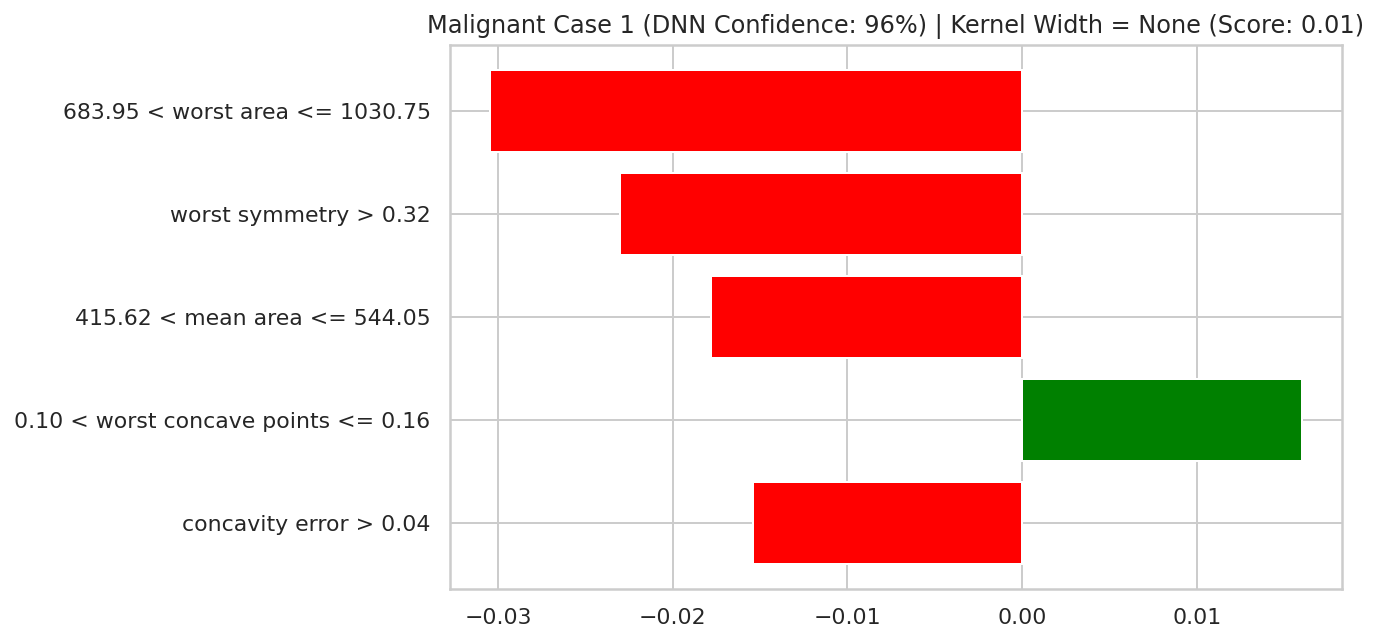

In [49]:
exp = explainer.explain_instance(X_test.numpy()[malignant_idx], 
                                 prob, 
                                 num_features=5, 
                                 top_labels=1)
f, ax = lime_exp_as_pyplot(exp)
ax.set_title('Malignant Case 1 (DNN Confidence: %d%%) | Kernel Width = None (Score: %.2f)' % (100 - round(y_conf[malignant_idx] * 100),
                                                                                               exp.score))
# f.savefig('images/chapter_04_lime_malignant.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_lime_malignant.pdf', format='pdf', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Benign Case 2 (DNN Confidence: 55%) | Kernel Width = None (Score: 0.20)')

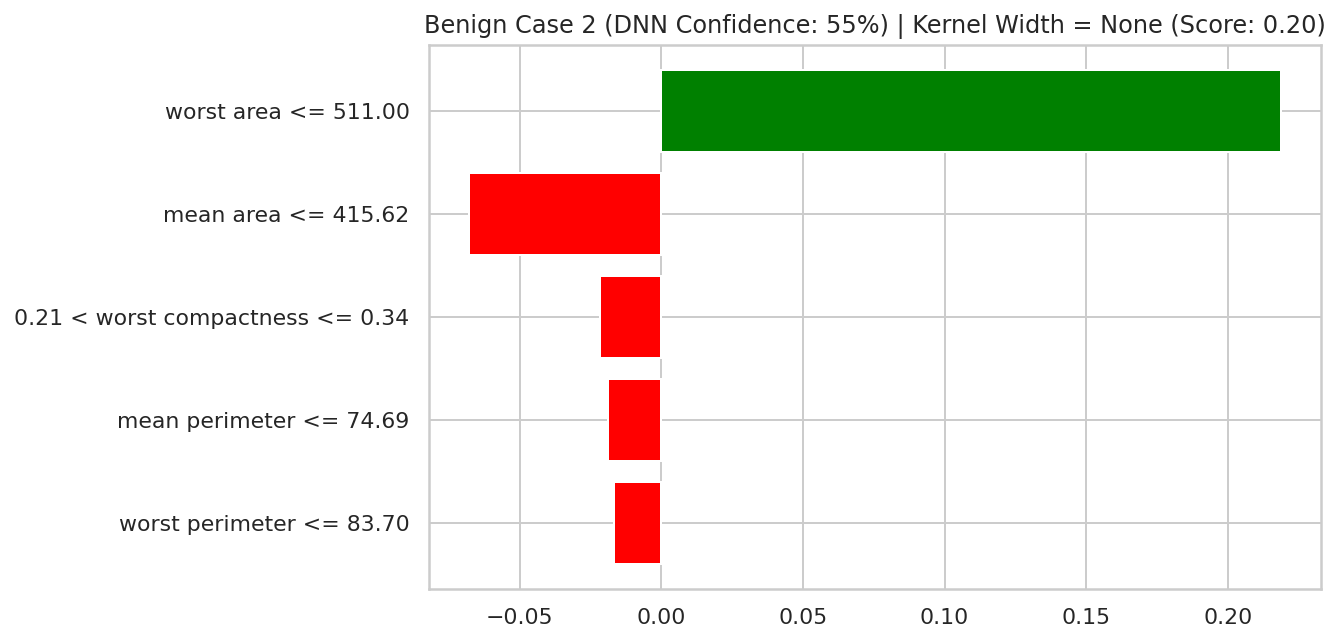

In [50]:
benign_idx2 = np.where(y_test.numpy() == 1)[0][1]
exp = explainer.explain_instance(X_test.numpy()[benign_idx2], 
                                 prob, 
                                 num_features=5, 
                                 top_labels=1)
f, ax = lime_exp_as_pyplot(exp)
ax.set_title('Benign Case 2 (DNN Confidence: %d%%) | Kernel Width = None (Score: %.2f)' % (round(y_conf[benign_idx2] * 100),
                                                                                            exp.score))
# f.savefig('images/chapter_04_lime_benign2.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_lime_benign2.pdf', format='pdf', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Malignant Case 2 (DNN Confidence: 92%) | Kernel Width = None (Score: 0.54)')

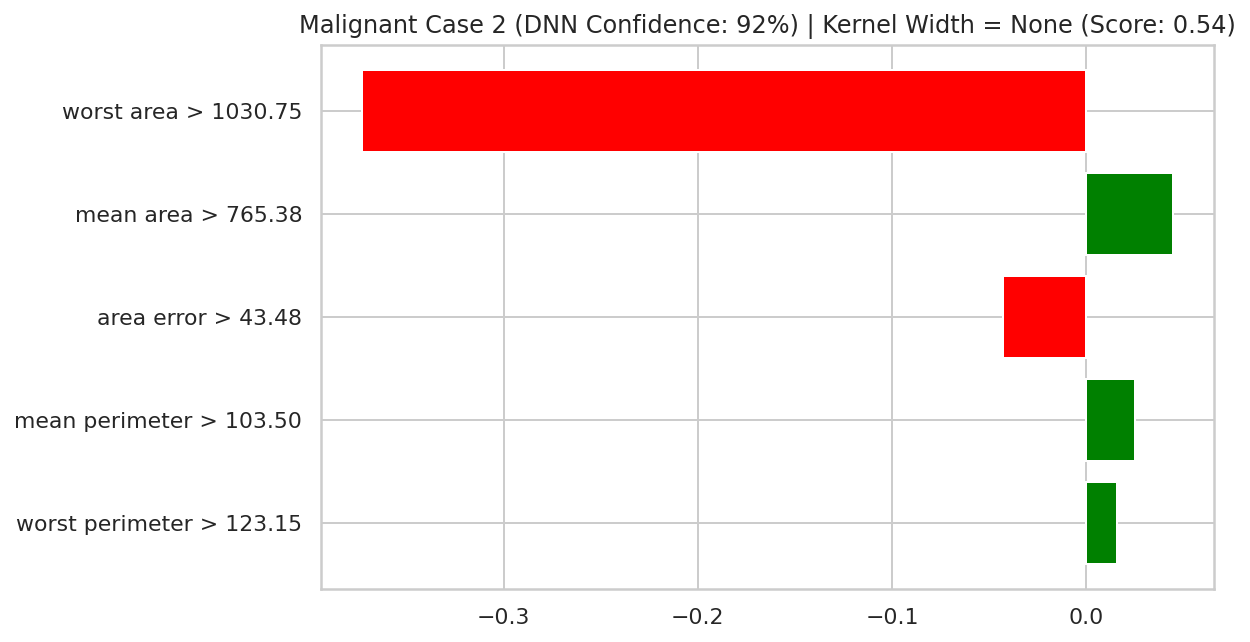

In [51]:
malignant_idx2 = np.where(y_test.numpy() == 0)[0][1]
exp = explainer.explain_instance(X_test.numpy()[malignant_idx2], 
                                 prob, 
                                 num_features=5, 
                                 top_labels=1)
f, ax = lime_exp_as_pyplot(exp)
ax.set_title('Malignant Case 2 (DNN Confidence: %d%%) | Kernel Width = None (Score: %.2f)' % (100 - round(y_conf[malignant_idx2] * 100),
                                                                                                exp.score))
# f.savefig('images/chapter_04_lime_malignant2.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_lime_malignant2.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [52]:
explainer_kw1 = lime.lime_tabular.LimeTabularExplainer(X_train.numpy(), 
                                                       feature_names=data.feature_names, 
                                                       class_names=data.target_names,
                                                       kernel_width=1,
                                                       discretize_continuous=True)

Text(0.5, 1.0, 'Benign Case 2 (DNN Confidence: 55%) | Kernel Width = 1 (Score: 0.21)')

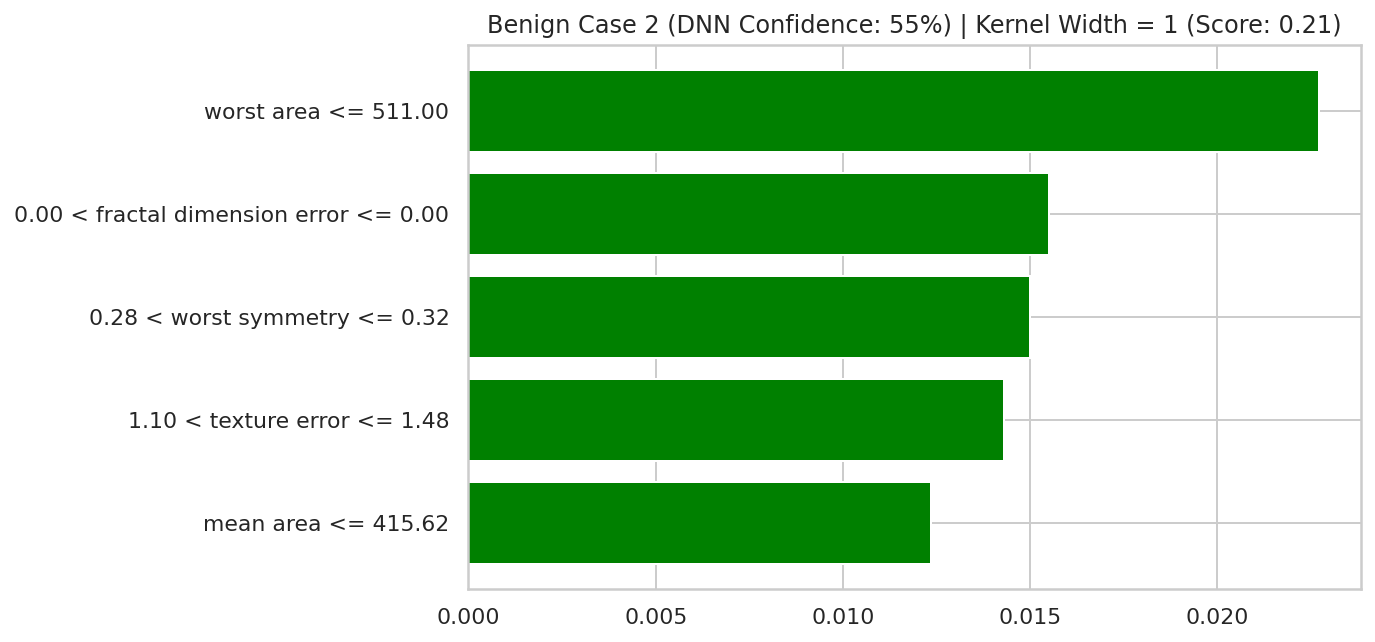

In [53]:
exp = explainer_kw1.explain_instance(X_test.numpy()[benign_idx2], 
                                     prob, 
                                     num_features=5, 
                                     top_labels=1)
f, ax = lime_exp_as_pyplot(exp)
ax.set_title('Benign Case 2 (DNN Confidence: %d%%) | Kernel Width = 1 (Score: %.2f)' % (round(y_conf[benign_idx2] * 100),
                                                                                         exp.score))
# f.savefig('images/chapter_04_lime_benign_kw1_2.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_lime_benign_kw1_2.pdf', format='pdf', dpi=300, bbox_inches='tight');

Text(0.5, 1.0, 'Malignant Case 2 (DNN Confidence: 92%) | Kernel Width = 1 (Score: 0.18)')

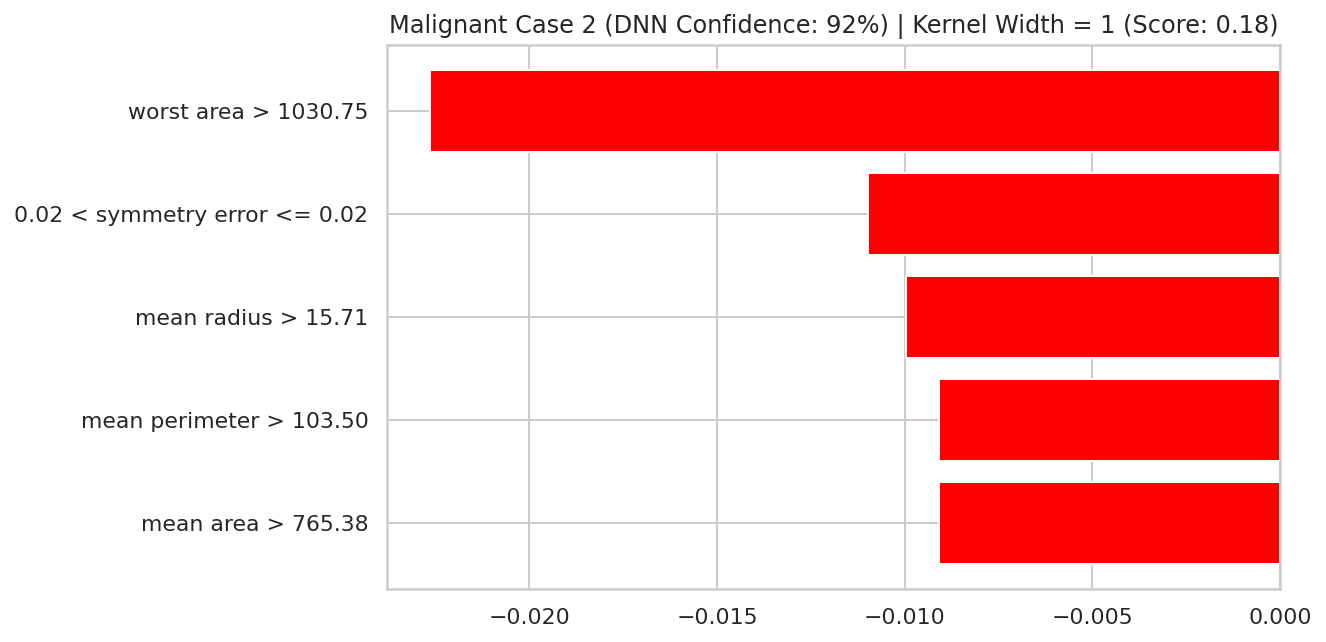

In [54]:
malignant_idx2 = np.where(y_test.numpy() == 0)[0][1]
exp = explainer_kw1.explain_instance(X_test.numpy()[malignant_idx2], 
                                     prob, 
                                     num_features=5, 
                                     top_labels=1)
f, ax = lime_exp_as_pyplot(exp)
ax.set_title('Malignant Case 2 (DNN Confidence: %d%%) | Kernel Width = 1 (Score: %.2f)' % (100 - round(y_conf[malignant_idx2] * 100),
                                                                                          exp.score))
# f.savefig('images/chapter_04_lime_malignant_kw1_2.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_lime_malignant_kw1_2.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [55]:
exp.score

0.1772481939428201

In [56]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

In [57]:
def prob(data):
    return model.forward(Variable(torch.from_numpy(data)).float()).detach().numpy().reshape(-1, 1)

In [58]:
shap_explainer = shap.KernelExplainer(prob, 
                                      X_train.numpy(), 
                                      link="logit")
shap_values = shap_explainer.shap_values(X_test.numpy(), nsamples=100)

Using 398 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/86 [00:00<?, ?it/s]

In [59]:
X_train.shape

torch.Size([398, 30])

In [60]:
benign_idx = np.where(y_test.numpy() == 1)[0][0]
malignant_idx = np.where(y_test.numpy() == 0)[0][0]
benign_idx2 = np.where(y_test.numpy() == 1)[0][1]
malignant_idx2 = np.where(y_test.numpy() == 0)[0][1]

In [61]:
df_test = pd.DataFrame(X_test.numpy(), columns=data['feature_names'])

In [62]:
shap.initjs()
plot = shap.force_plot(shap_explainer.expected_value[0], 
                       shap_values[0][benign_idx,:], 
                       X_test.numpy()[benign_idx,:],
                       feature_names=data['feature_names'],
                       link="logit")
shap.save_html('/chapter_04_shap_benign.html', plot, full_html=True)
plot

In [63]:
shap.initjs()
plot = shap.force_plot(shap_explainer.expected_value[0], 
                        shap_values[0][benign_idx2,:], 
                        X_test.numpy()[benign_idx2,:],
                        feature_names=data['feature_names'],
                        link="logit")
shap.save_html('/chapter_04_shap_benign2.html', plot, full_html=True)
plot

In [64]:
shap.initjs()
# Plot the SHAP values for the Malignant case
plot = shap.force_plot(shap_explainer.expected_value[0], 
                       shap_values[0][malignant_idx,:], 
                       X_test.numpy()[malignant_idx,:], 
                       feature_names=data['feature_names'],
                       link="logit")
shap.save_html('/chapter_04_shap_malignant.html', plot, full_html=True)
plot
# f.savefig('images/chapter_04_shap_malignant.png', dpi=300, bbox_inches='tight');
# f.savefig('images/chapter_04_shap_malignant.pdf', format='pdf', dpi=300, bbox_inches='tight');

In [65]:
shap.initjs()
# Plot the SHAP values for the Malignant case
plot = shap.force_plot(shap_explainer.expected_value[0], 
                       shap_values[0][malignant_idx2,:], 
                       X_test.numpy()[malignant_idx2,:], 
                       feature_names=data['feature_names'],
                       link="logit")
shap.save_html('/chapter_04_shap_malignant2.html', plot, full_html=True)
plot